In [ ]:
#Librerias 
import math as mt
import numpy as np
import matplotlib.pylab as plt 

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
def S1(N):
  Sn=0
  for n in range(1,2*N+1):
    an=((-1)**n)*(n/(n+1))
    Sn=Sn+an
  return Sn

def S2(N):
  Sn1=0
  Sn2=0
  for n in range(1,N+1):
    an=(2*n-1)/(2*n)
    Sn1=Sn1+an
  for n in range(1,N+1):
    bn=2*n/(2*n+1)
    Sn2=Sn2+bn
  return Sn2-Sn1


def S3(N):
  Sn=0
  for n in range(1,N+1):
    an=1/(2*n*(2*n+1))
    Sn=Sn+an
  return Sn

N=3
print(S1(N),S2(N),S3(N))

0.2404761904761904 0.2404761904761905 0.24047619047619048


Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

In [ ]:
xlog=np.logspace(0,7)
xlog
E1=np.zeros(50)
for i in range(len(xlog)):
  E1[i]=abs((S1(int(xlog[i]))-S3(int(xlog[i])))/S3(int(xlog[i])))
  print(i,E1[i])
E1


In [ ]:
E2=np.zeros(50)
for i in range(len(xlog)):
  E2[i]=abs((S2(int(xlog[i]))-S3(int(xlog[i])))/S3(int(xlog[i])))
  print(i,E2[i])
E2

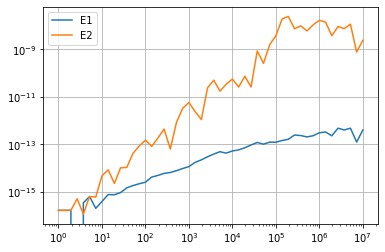

In [78]:
plt.figure()
plt.plot(xlog,E1,label='E1')
plt.plot(xlog,E2,label='E2')
plt.xscale('log')
plt.yscale('log')  
plt.legend()
plt.grid()
plt.show()



---


Como se observa en la figura el error va aumentando a medida que aumenta el número de iteraciones. Pero Aumenta más para la segunda serie que para la primera, por lo que se puede concluir que la primera serie es más precisa ya que tiene menos propagación de error.


---



---



## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

In [148]:
def f1(x, r, n):
  N= np.zeros(n)
  for i in range(n):
    x = r*x*(1-x)
    N[i]=x
  return N

def f2(x,r,n):
  N= np.zeros(n)
  for i in range(n):
    x=r*x-r*x**2
    N[i]=x
  return N

def f3(x,r,n):
  N= np.zeros(n)
  for i in range(n):
    if x != 0:
      x=(r*x**2)*(1/x-1)
      N[i]=x
  return N



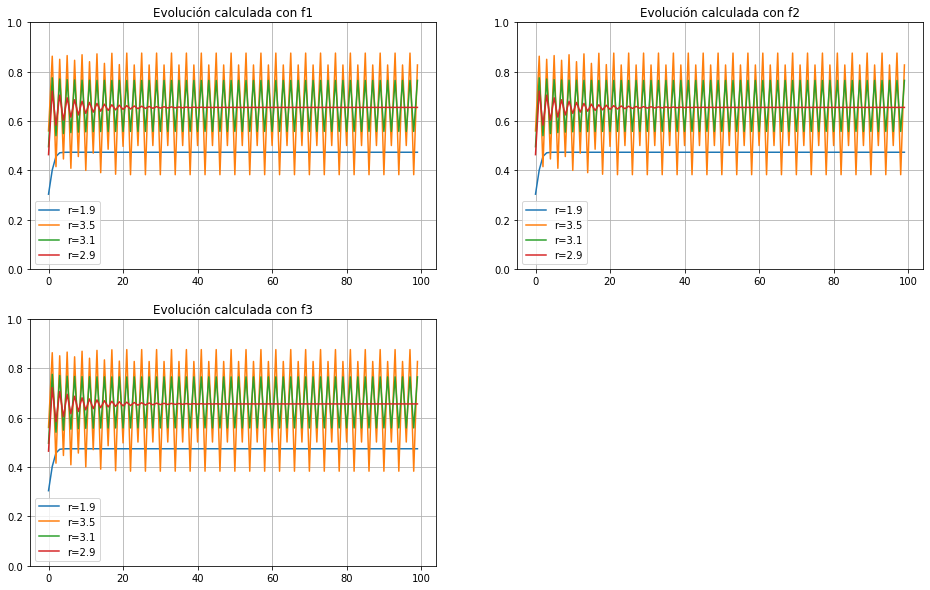

In [214]:
x=0.8
r=3.5
n=100
axis=np.arange(0,n,1) #Un array para acompañar la numeración de iteraciones en el gráfico

plt.figure(figsize = (16, 10))

plt.subplot(2,2,1)
for i in [1.9,3.5,3.1,2.9]:
  plt.plot(axis,f1(x,i,n),label='r={}'.format(i))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title('Evolución calculada con f1')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
for i in [1.9,3.5,3.1,2.9]:
  plt.plot(axis,f2(x,i,n),label='r={}'.format(i))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title('Evolución calculada con f2')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
for i in [1.9,3.5,3.1,2.9]:
  plt.plot(axis,f3(x,i,n),label='r={}'.format(i))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title('Evolución calculada con f3')
plt.legend()
plt.grid()



plt.show()